# STEP 8

Burgers' Equation in 2D

The PDE describing this phenomena is given below,
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

The discretized equation is given below,
$$
\begin{split}
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
\qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$
$$
\begin{split}
 \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
\qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

Re-arranging the above equation in terms of the unknown terms, we get the below equations:
    $$
\begin{split}
u_{i,j}^{n+1} =  u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$
$$
\begin{split}
v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

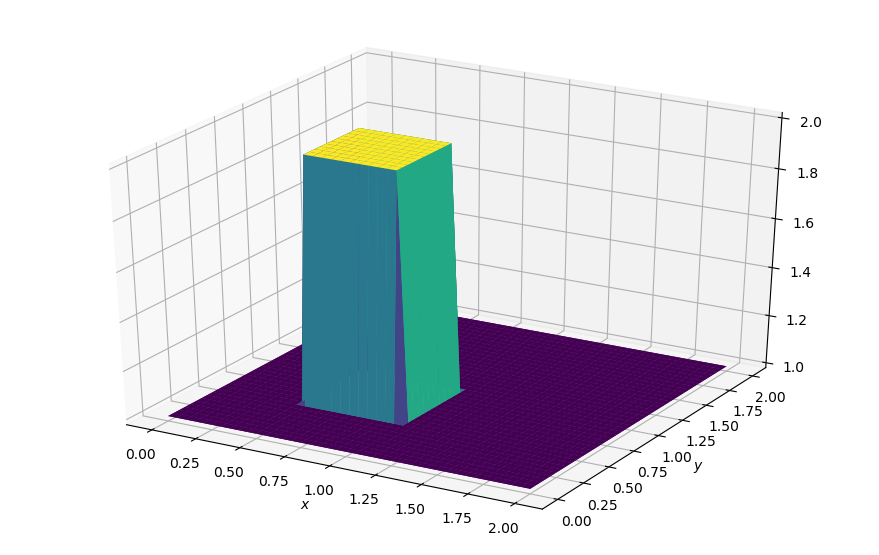

In [31]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
nx=41
ny=41
nt=101
dx=2/(nx-1)
dy=2/(ny-1)
sigma=0.0009
nu=0.01
dt=sigma*dx*dy/nu
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)
u=numpy.ones((ny,nx))
v=numpy.ones((ny,nx))
un=numpy.ones((ny,nx))
vn=numpy.ones((ny,nx))
comb=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2
v[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)]=2
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

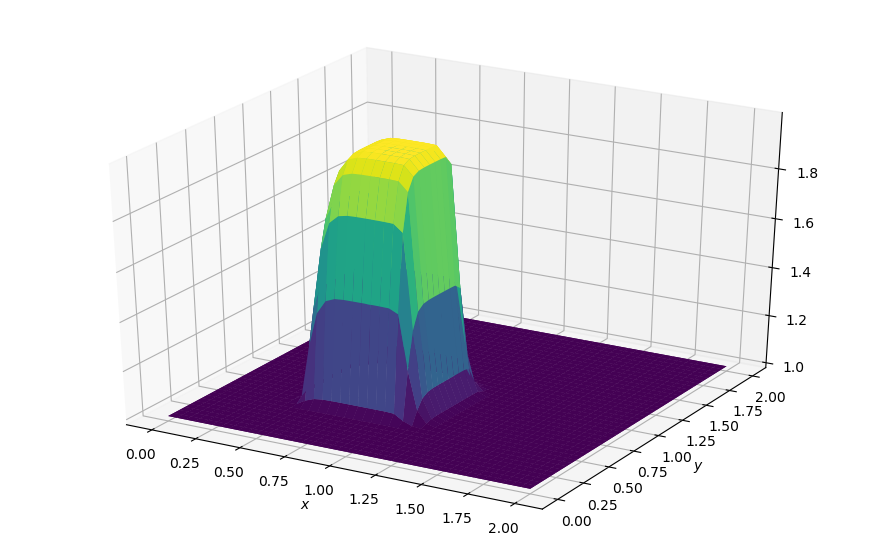

In [32]:
for n in range(nt+1):
    un=u.copy()
    vn=v.copy()
    for j in range(nx-1):
        for i in range(ny-1):
            u[j,i]=un[j,i]-(un[j,i]*(dt/dx)*(un[j,i]-un[j,i-1]))-(vn[j,i]*(dt/dy)*(un[j,i]-un[j-1,i]))+(nu*(dt/dx**2)*(un[j,i+1]-(2*un[j,i])+un[j,i-1]))+(nu*(dt/dy**2)*(un[j+1,i]-(2*un[j,i])+un[j-1,i]))
    for j in range(nx-1):
        for i in range(ny-1):
            v[j,i]=vn[j,i]-(un[j,i]*(dt/dx)*(vn[j,i]-vn[j,i-1]))-(vn[j,i]*(dt/dx)*(vn[j,i]-vn[j-1,i]))+(nu*(dt/dx**2)*(vn[j,i+1]-(2*vn[j,i])+vn[j,i-1]))+(nu*(dt/dy**2)*(vn[j+1,i]-(2*vn[j,i])+vn[j-1,i]))
    u[0,:]=1
    u[-1,:]=1
    u[:,0]=1
    u[:,-1]=1
    v[0,:]=1
    v[-1,:]=1
    v[:,0]=1
    v[:,-1]=1
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
    